In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-forecasting/mock_kaggle.csv


In [13]:
#getting the data

data=pd.read_csv("../input/retail-sales-forecasting/mock_kaggle.csv")

In [14]:
#check first few observations 

data.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [10]:
#check last few observations

data.tail()

,data,venda,estoque,preco
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39
936,2016-07-31,183,3642,2.39


In [18]:
#to understand the data types, null values if any

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [21]:
#importing necessary libraries before we proceed

import numpy as np
import pandas as pd
import matplotlib.pyplot as mpp
import seaborn as sb
%matplotlib inline

In [22]:
#1. Dataset has 4 variables that are time dependent with 937 observations
#2. Dataset has venda(sales), estoque(stock) and preco(price) details (in portugese)
#3. Dataset has sales as target variable
#4. Date is in string format

In [28]:
#rename columns from Portugese to English

data = data.rename(columns = {'data':'Date', 
                              'venda': 'Sales', 
                              'estoque': 'Stock', 
                              'preco': 'Price'})

In [30]:
data.head()

,Date,Sales,Stock,Price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [33]:
#to check missing values

data.isnull().sum()

Date     0
Sales    0
Stock    0
Price    0
dtype: int64

In [35]:
#to convert string format to date format

data['Date'] = pd.to_datetime(data['Date'])

In [37]:
#adding columns/features

data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Revenue'] = data['Sales'] * data['Price']

#Here the data has features Sales, Stock, Price datewise. We added Revenue as new feature in addition to splitting the date column into day, month and year.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     937 non-null    datetime64[ns]
 1   Sales    937 non-null    int64         
 2   Stock    937 non-null    int64         
 3   Price    937 non-null    float64       
 4   Day      937 non-null    int64         
 5   Month    937 non-null    int64         
 6   Year     937 non-null    int64         
 7   Revenue  937 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 58.7 KB


In [38]:
#set date as index

data.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

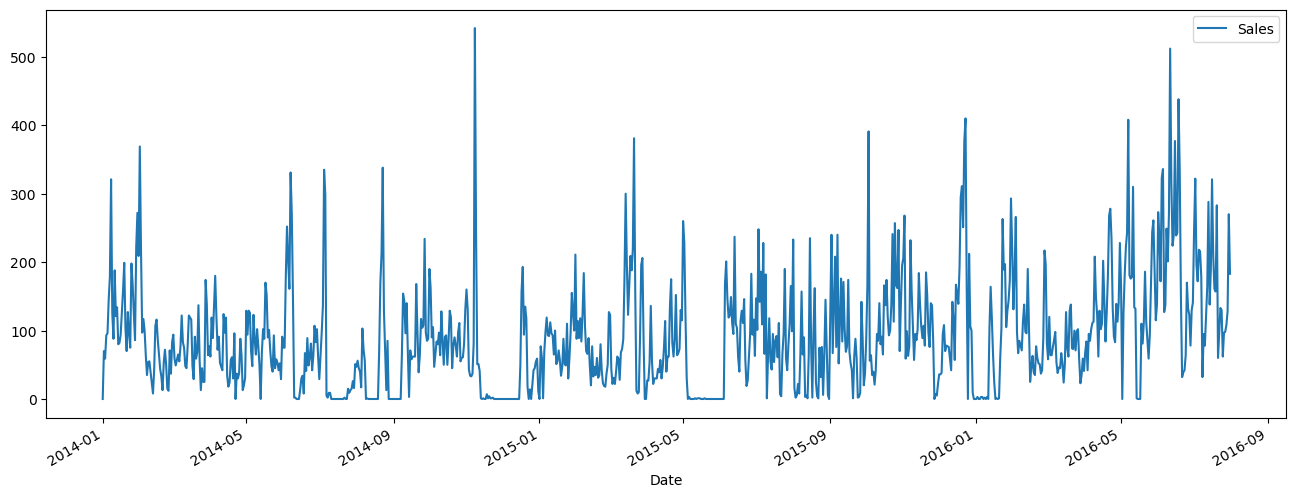

In [39]:
#visualisation of our target variable 

data['Sales'].plot(figsize = (16,6), legend = True)

<AxesSubplot:xlabel='Date'>

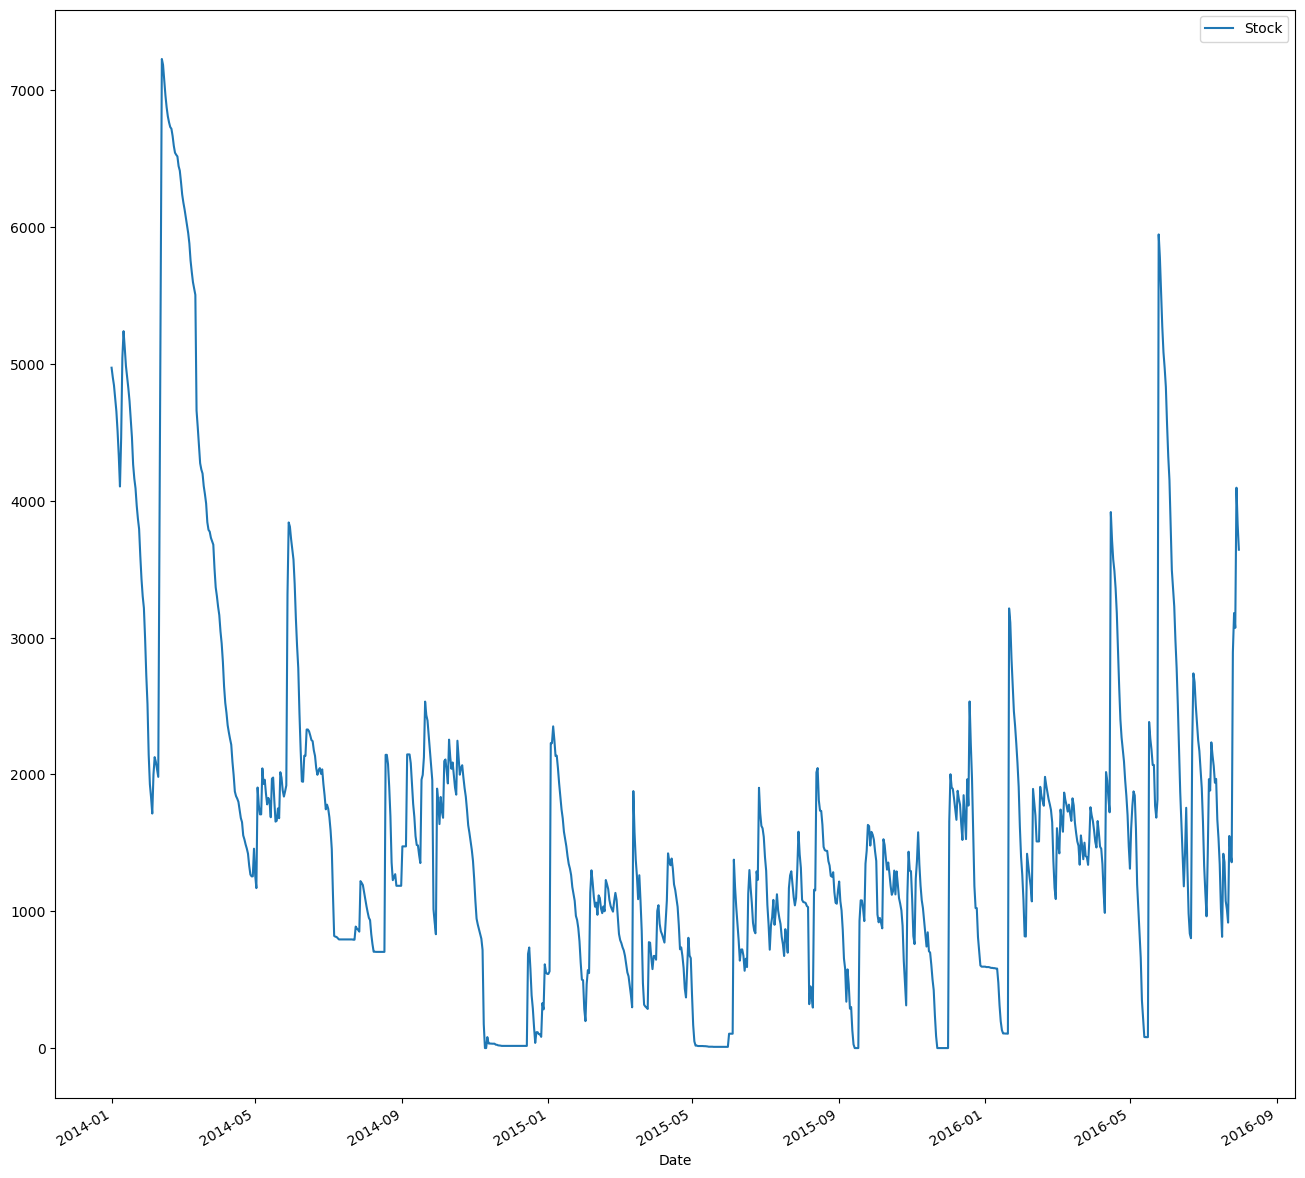

In [40]:
#visualisation of our other variables 

data['Stock'].plot(figsize = (16,16), legend = True)

<AxesSubplot:xlabel='Date'>

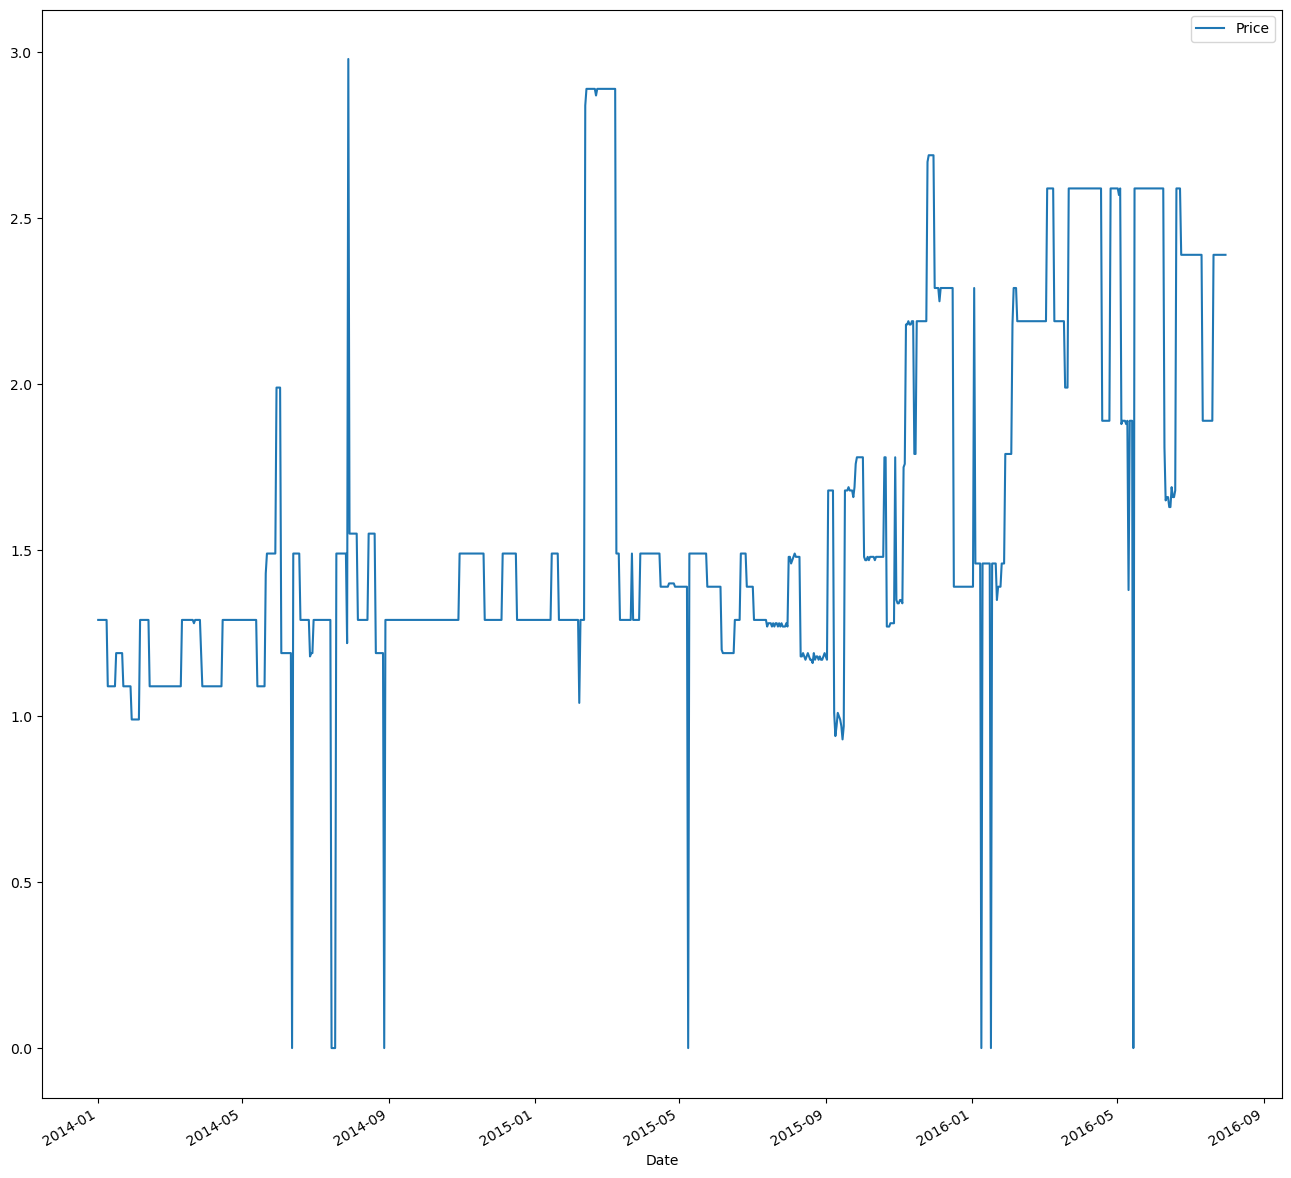

In [28]:
data['Price'].plot(figsize = (16,16), legend = True)

<AxesSubplot:xlabel='Date'>

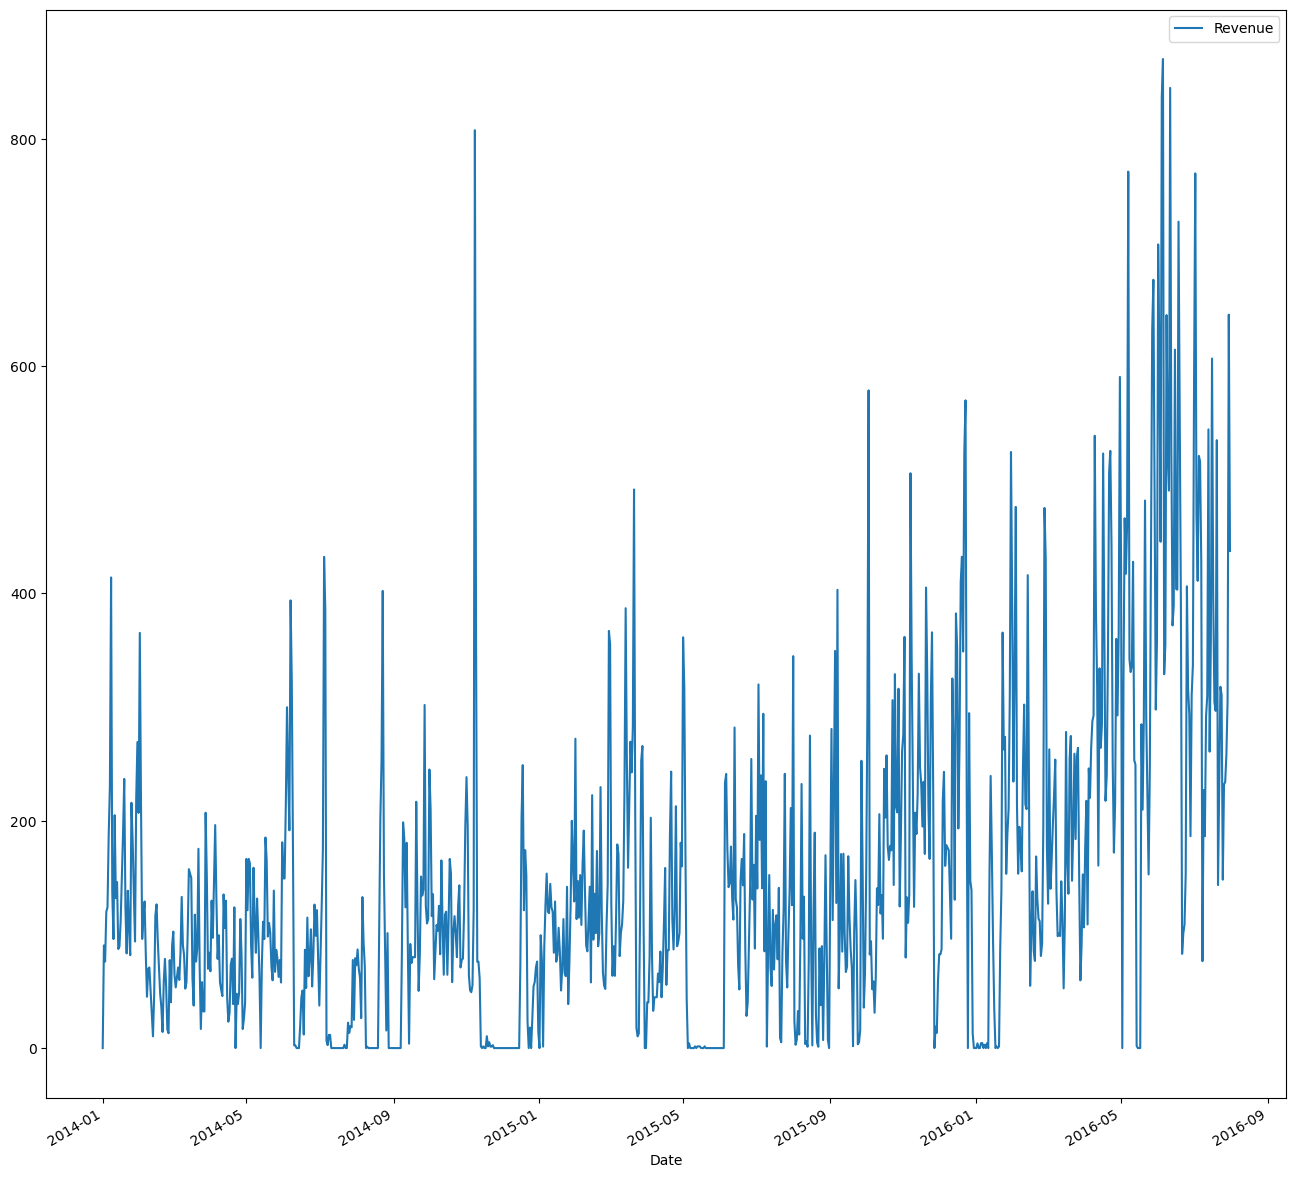

In [29]:
data['Revenue'].plot(figsize = (16,16), legend = True)

#from the above plots we can say that there is no trend but there is seasonality

In [31]:
#plot acf and pacf plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

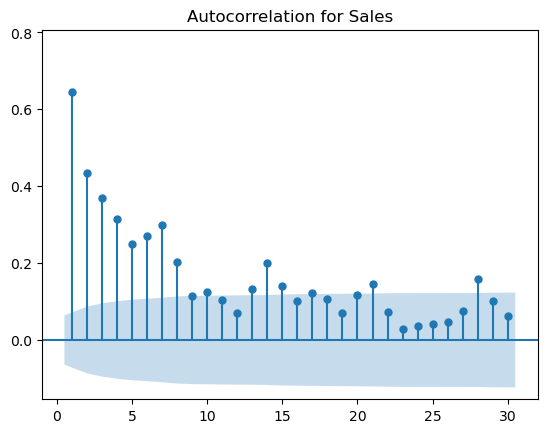

In [32]:
plot_acf(data['Sales'], lags = 30, title='Autocorrelation for Sales', zero=False, auto_ylims=True)
mpp.show()

#ACF plot shows significant 10 lags 

In [ ]:
plot_pacf(data['Sales'], lags = 30, title='Partial Autocorrelation for Sales', zero=False, auto_ylims=True)
mpp.show()

#PACF plot shows significant 1 lag

#Since the data has no significant trend but there is seasonality we can opt for models like Holt Winters Exponential Smoothing(seasonality).

In [ ]:
#to check stationarity in the data

import statsmodels.tsa.stattools as sts

In [2]:
sts.adfuller(data['Sales'])

#sales is stationary (p-value<0.05). but it has some seasonality

NameError: name 'sts' is not defined

In [ ]:
sts.adfuller(data['Stock'])

#stock is stationary (p-value<0.05)

In [ ]:
sts.adfuller(data['Price'])

#data is stationary (p-value<0.05)

In [ ]:
sts.adfuller(data['Revenue'])

#data is stationary (p-value<0.05)

#Here our target variable is Sales and we need to forecast sales hence from now we will only focus on Sales column

In [ ]:
#To understand seasonality in detail. Let's try Seasonal decomposition 

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
sd_sales = seasonal_decompose(data['Sales'], model='additive', period = 7)
sd_sales.plot()
mpp.show()

In [ ]:
sd_sales.trend.plot(figsize = (40,15))   #there is no indicative trend or pattern

In [ ]:
sd_sales.seasonal.plot(figsize = (50,15)) #there is seasonality

We can see that there is seasonality but no trend.

In [ ]:
#to check correlation (if there is correlation we may have to opt for a different model)

data[['Sales', 'Stock', 'Price']].corr()

Since there is no correlation between we can go for simple models 

We have 2 approaches to this: 1. difference the data (due to seasonality) and model (ARMA, Holt Winters) 2. without differencing go for more robust models (like XGBoosting)

In [ ]:
#First Approach : 
#as we have seasonality (non-stationary) data needs to be converted/flattened. 

data['Sales_Shift'] = data['Sales'].shift(periods = 1)

#here period is 1 as we are taking one previous value 

In [ ]:
data.head()

In [ ]:
#differencing method (subtract Sales from Sales_shift)

data['diff'] = data['Sales']-data['Sales_Shift']

In [ ]:
data['diff'].plot()    

#now the data is stationary 

In [ ]:
data.head()

In [ ]:
#since first value in diff is NaN we should exlude this while modelling or finding correlations 

data1 = data[1:]

In [ ]:
data1.head()  #we should consider diff as our new target variable

In [ ]:
#split the data into train and test

size = int(len(data1)*0.70)   
#splitting the first 70% data zto train and the rest to test

train_data = data1[:size]
train_data.tail()

In [ ]:
test_data = data1[size:]
test_data.head()

In [ ]:
#AR model

from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(train_data['diff'], order = (6, 0, 0))
ar_model_results = ar_model.fit()
ar_model_results.summary()

we found that the more number of lags higher the AIC hence we stopped. AR(6) had low AIC

In [ ]:
#MA model

ma_model = ARIMA(train_data['diff'], order = (0, 0, 5))
ma_model_results = ma_model.fit()
ma_model_results.summary()

In [ ]:
#ARMA model

arma_model = ARIMA(train_data['diff'], order = (1, 0, 1))
arma_model_results = arma_model.fit()
arma_model_results.summary()

In [ ]:
#for predictions importing necessary libraries

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
import math

In [ ]:
#Predicting the test data using AR model

start = len(train_data['diff'])
end = len(train_data['diff'])+len(test_data['diff'])-1

Prediction1 = ar_model_results.predict(start=start, end=end)

Prediction1.index = data1.index[start:end+1]

print(Prediction1)

Prediction1.plot(figsize = (15, 5), color = 'red')
test_data['diff'].plot(figsize = (15, 5), color = 'blue')

mpp.title('Actual vs Predictions for test data using AR model')
mpp.show()

In [ ]:
rmse1 = math.sqrt(mean_squared_error(test_data['diff'], Prediction1))
rmse1

In [ ]:
#Predicting the test data using MA model

Prediction2 = ma_model_results.predict(start=start, end=end)

Prediction2.index = data1.index[start:end+1]

print(Prediction2)

Prediction2.plot(figsize = (15, 5), color = 'red')
test_data['diff'].plot(figsize = (15, 5), color = 'blue')

mpp.title('Actual vs Predictions for test data using MA model')
mpp.show()

In [ ]:
rmse2 = math.sqrt(mean_squared_error(test_data['diff'], Prediction2))
rmse2

In [ ]:
#Predicting the test data using ARMA model

Prediction3 = arma_model_results.predict(start=start, end=end)

Prediction3.index = data1.index[start:end+1]

print(Prediction3)

Prediction3.plot(figsize = (15, 5), color = 'red')
test_data['diff'].plot(figsize = (15, 5), color = 'blue')

mpp.title('Actual vs Predictions for test data using ARMA model')
mpp.show()

In [ ]:
rmse3 = math.sqrt(mean_squared_error(test_data['diff'], Prediction3))
rmse3

In [ ]:
#build simple exponential smoothing model and forecast

from statsmodels.tsa.api import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_data['diff'])
ses_model_results = ses_model.fit()
len(test_data['diff'])

start_index = len(train_data['diff'])
end_index = len(train_data['diff']) + len(test_data['diff'])-1

Prediction5 = ses_model_results.predict(start_index, end_index)
Prediction5.index = data1.index[start_index:end_index+1]
print(Prediction5)

actual_vs_pred = pd.concat([test_data['diff'], Prediction5], axis=1)
actual_vs_pred.plot(figsize = (15,5))

rmse5 = math.sqrt(mean_squared_error(test_data['diff'], Prediction5))
rmse5

In [ ]:
### Holt Winters Exponential Smoothing method 

from statsmodels.tsa.holtwinters import ExponentialSmoothing

holt_model = ExponentialSmoothing(train_data['diff'], seasonal_periods=7, trend=None, seasonal='add')

holt_model_results = holt_model.fit()
len(test_data['diff'])

Prediction6 = holt_model_results.predict(start_index, end_index)
Prediction6.index = data1.index[start_index:end_index+1]
print(Prediction6)

actual_vs_pred = pd.concat([test_data['diff'], Prediction6], axis=1)
actual_vs_pred.plot(figsize = (40,15))

rmse6 = math.sqrt(mean_squared_error(test_data['diff'], Prediction6))
rmse6

By comparing RMSE we can say that Holt Winters is our best model so far with RMSE as 67. 

#Let's consider approach 2: Implementing robust model like XGBoosting on the un differenced data 

In [ ]:
import xgboost as xgb

In [ ]:
data.head()

In [ ]:
#split the data into train and test data

size = int(len(data)*0.7)

train_data = data[:size]
test_data = data[size:]

In [ ]:
train_data.tail()

In [ ]:
test_data.head()

In [ ]:
#split the data into x train, y train and x test, y test
#for boosting we need to split the independent and dependent variables

x_train = train_data[['Stock', 'Price', 'Day', 'Month', 'Year', 'Revenue']]
y_train = train_data['Sales']

x_test = test_data[['Stock', 'Price', 'Day', 'Month', 'Year', 'Revenue']]
y_test = test_data['Sales']

In [1]:
xgb_model = xgb.XGBRegressor(n_estimators = 100, 
                             early_stopping_rounds = 50)

xgb_model_results = xgb_model.fit(x_train, 
                                  y_train, 
                                  eval_set = [(x_test, y_test)], verbose = 25)

NameError: name 'xgb' is not defined

In [ ]:
#Feature importance (understanding top features which influenced target variable)

feature_imp = pd.DataFrame(data=xgb_model_results.feature_importances_, 
                           index=xgb_model_results.feature_names_in_,
                          columns = ['importance_score'])

In [ ]:
feature_imp.sort_values(by = 'importance_score', ascending=False)

From the above table we understand that Revenue had a huge impact on target variable

In [ ]:
#Since Boosting has given us good RMSE as low 17 from Holt Winters model had rmse of 67. 
#we shall use boosting model for our predictions

In [ ]:
#Predicting on test data

Prediction7 = xgb_model_results.predict(x_test)

In [ ]:
rmse7 = math.sqrt(mean_squared_error(y_test, Prediction7))
rmse7

In [ ]:
print(Prediction7)

XGBoosting gave rmse as 17.36 without having to difference the data. Hence this model is robust and proved to be the best.